Ở phần 3.1, ta đã được giới thiệu hồi quy tuyến tính, triển khai toàn bộ từ đầu trong phần 3.4 và dùng API cao cấp trong phần 3.5.

Hồi quy là công cụ đắc lực có thể sử dụng khi ta muốn trả lời câu hỏi bao nhiêu?. Nếu bạn muốn dự đoán một ngôi nhà sẽ được bán với giá bao nhiêu tiền (Đô la), hay số trận thắng mà một đội bóng có thể đạt được, hoặc số ngày một bệnh nhân phải điều trị nội trú trước khi được xuất viện, thì có lẽ bạn đang cần một mô hình hồi quy.

Trong thực tế, chúng ta thường quan tâm đến việc phân loại hơn: không phải câu hỏi bao nhiêu? mà là loại nào?

- Email này có phải thư rác hay không?
- Khách hàng này nhiều khả năng đăng ký hay không đăng ký một dịch vụ thuê bao?
- Hình ảnh này mô tả một con lừa, một con chó, một con mèo hay một con gà trống?
- Bộ phim nào có khả năng cao nhất được Aston xem tiếp theo?

Thông thường, những người làm về học máy dùng từ phân loại để mô tả đôi chút sự khác nhau giữa hai bài toán: (i) ta chỉ quan tâm đến việc gán cứng một danh mục cho mỗi ví dụ: là chó, là gà, hay là mèo?; và (ii) ta muốn gán mềm tất cả các danh mục cho mỗi ví dụ, tức đánh giá xác suất một ví dụ rơi vào từng danh mục khả dĩ: là chó (92%), là gà (1%), là mèo (7%). Sự khác biệt này thường không rõ ràng, một phần bởi vì thông thường ngay cả khi chúng ta chỉ quan tâm đến việc gán cứng, chúng ta vẫn sử dụng các mô hình thực hiện các phép gán mềm.

# 3.4.1. Bài toán phân loại

Hãy khởi động với một bài toán phân loại hình ảnh đơn giản. Ở đây, mỗi đầu vào là một ảnh xám có kích thước  $2×2$. Bằng cách biểu diễn mỗi giá trị điểm ảnh bởi một số vô hướng, ta thu được bốn đặc trưng $x_1,x_2,x_3,x_4$. Hơn nữa, giả sử rằng mỗi hình ảnh đều thuộc về một trong các danh mục “mèo”, “gà” và “chó”.

Tiếp theo, ta cần phải chọn cách biểu diễn nhãn. Ta có hai cách làm hiển nhiên. Cách tự nhiên nhất có lẽ là chọn  $y∈{1,2,3}$ lần lượt ứng với {chó, mèo, gà}. Đây là một cách lưu trữ thông tin tuyệt vời trên máy tính. Nếu các danh mục có một thứ tự tự nhiên giữa chúng, chẳng hạn như {trẻ sơ sinh, trẻ tập đi, thiếu niên, thanh niên, người trưởng thành, người cao tuổi}, sẽ là tự nhiên hơn nếu coi bài toán này là một bài toán hồi quy và nhãn sẽ được giữ nguyên dưới dạng số.

Nhưng nhìn chung các lớp của bài toán phân loại không tuân theo một trật tự tự nhiên nào. May mắn thay, các nhà thông kê từ lâu đã tìm ra một cách đơn giản để có thể biểu diễn dữ liệu danh mục: biểu diễn one-hot. Biểu diễn one-hot là một vector với số lượng thành phần bằng số danh mục mà ta có. Thành phần tương ứng với từng danh mục cụ thể sẽ được gán giá trị 1 và tất cả các thành phần khác sẽ được gán giá trị 0.
$$y∈{(1,0,0),(0,1,0),(0,0,1)}.$$

Trong trường hợp này,  $y$ sẽ là một vector 3 chiều, với $(1,0,0)$ tương ứng với “mèo”, $(0,1,0)$ ứng với “gà” và $(0,0,1)$ ứng với “chó”.

## 3.4.1.1. Kiến trúc mạng

Để tính xác suất có điều kiện ứng với mỗi lớp, chúng ta cần một mô hình có nhiều đầu ra với một đầu ra cho mỗi lớp. Để phân loại với các mô hình tuyến tính, chúng ta cần số hàm tuyến tính tương đương số đầu ra. Mỗi đầu ra sẽ tương ứng với hàm tuyến tính của chính nó. Trong trường hợp này, vì có 4 đặc trưng và 3 đầu ra, chúng ta sẽ cần 12 số vô hướng để thể hiện các trọng số, ( $w$ với các chỉ số dưới) và 3 số vô hướng để thể hiện các hệ số điều chỉnh ( $b$ với các chỉ số dưới). Chúng ta sẽ tính ba logits,  $o_1$,$o_2$, và $o_3$, cho mỗi đầu vào:

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

Chúng ta có thể mô tả phép tính này với biểu đồ mạng nơ-ron được thể hiện trong Fig. 3.4.1. Như hồi quy tuyến tính, hồi quy softmax cũng là một mạng nơ-ron đơn tầng. Và vì sự tính toán của mỗi đầu ra, $o_1,o_2,$ và  $o_3$, phụ thuộc vào tất cả đầu vào,  $x_1,  x_2, x_3,$ và  $x_4$, tầng đầu ra của hồi quy softmax cũng có thể được xem như một tầng kết nối đầy đủ.

![Softmax regression is a single-layer neural network.](http://d2l.ai/_images/softmaxreg.svg)

Để biểu diễn mô hình gọn hơn, chúng ta có thể sử dụng ký hiệu đại số tuyến tính. Ở dạng vector, ta có  $o=Wx+b$, một dạng phù hợp hơn cho cả toán và lập trình. Chú ý rằng chúng ta đã tập hợp tất cả các trọng số vào một ma trận  $3×4$ và với một mẫu cho trước $x$, các đầu ra được tính bởi tích ma trận-vector của các trọng số và đầu vào cộng với vector hệ số điều chỉnh  $b$.

## 3.4.1.2. Hàm Softmax

Chúng ta sẽ xem các giá trị đầu ra của mô hình là các giá trị xác suất. Ta sẽ tối ưu hóa các tham số của mô hình sao cho khả năng xuất hiện dữ liệu quan sát được là cao nhất. Sau đó, ta sẽ đưa ra dự đoán bằng cách đặt ngưỡng xác suất, ví dụ dự đoán nhãn đúng là nhãn có xác suất cao nhất (dùng hàm argmax).

Nói một cách chính quy hơn, ta mong muốn diễn dịch kết quả $\hat{y}_k$ là xác suất để một điểm dữ liệu cho trước thuộc về một lớp k nào đó. Sau đó, ta có thể chọn lớp cho điểm đó tương ứng với giá trị lớn nhất mà mô hình dự đoán $argmax_ky_k$. Ví dụ, nếu  $\hat{y}_1, \hat{y}_2$ và $\hat{y}_3$ lần lượt là $0.1, 0.8, 0.1$, thì ta có thể dự đoán điểm đó thuộc về lớp số 2 là “gà” (ứng với trong ví dụ trước).

Bạn có thể muốn đề xuất rằng ta lấy trực tiếp logit  $o$ làm đầu ra mong muốn. Tuy nhiên, sẽ có vấn đề khi coi kết qủa trả về trực tiếp từ tầng tuyến tính như là các giá trị xác suất. Lý do là không có bất cứ điều kiện nào để ràng buộc tổng của những con số này bằng  1. Hơn nữa, tùy thuộc vào đầu vào mà ta có thể nhận được giá trị âm. Các lý do trên khiến kết quả của tầng tuyến tính vi phạm vào các tiên đề cơ bản của xác xuất đã được nhắc đến trong Section 2.6.

Để có thể diễn dịch kết quả đầu ra là xác xuất, ta phải đảm bảo rằng các kết quả không âm và tổng của chúng phải bằng 1 (điều này phải đúng trên cả dữ liệu mới). Hơn nữa, ta cần một hàm mục tiêu trong quá trình huấn luyện để cho mô hình có thể ước lượng xác suất một cách chính xác. Trong tất cả các trường hợp, khi kết quả phân lớp cho ra xác suất là  $0.5$ thì ta hy vọng phân nửa số mẫu đó thực sự thuộc về đúng lớp được dự đoán. Đây được gọi là hiệu chuẩn.

Hàm softmax, được phát minh vào năm 1959 bởi nhà khoa học xã hội R Duncan Luce với chủ đề mô hình lựa chọn, thỏa mãn chính xác những điều trên. Để biến đổi kết quả logit thành kết quả không âm và có tổng là  $1$, trong khi vẫn giữ tính chất khả vi, đầu tiên ta cần lấy hàm mũ cho từng logit (để chắc chắn chúng không âm) và sau đó ta chia cho tổng của chúng (để chắc rằng tổng của chúng luôn bằng 1).

$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \text{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.$$

Dễ thấy rằng, $\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$ với $0≤\hat{y}_i≤1$ với mọi $i$. Do đó $\hat{y}$ là phân phối xác suất phù hợp với các giá trị của $\hat{\mathbf{y}}$ có thể được hiểu theo đó. Lưu ý rằng hàm softmax không thay đổi thứ tự giữa các logit và do đó ta vẫn có thể chọn ra lớp phù hợp nhất bằng cách:
$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

Các logit $o$ đơn giản chỉ là các giá trị trước khi cho qua hàm softmax để xác định xác xuất thuộc về mỗi danh mục. 

## 3.4.1.3. Vector hóa Minibatch

Để cải thiện hiệu suất tính toán và tận dụng GPU, ta thường phải thực hiện các phép tính vector cho các minibatch dữ liệu. Giả sử, ta có một minibatch $X$ của mẫu với số chiều $d$ và kích thước batch là $n$. Thêm vào đó, chúng ta có $q$ lớp đầu ra. Như vậy, minibatch đặc trưng $X$ sẽ thuộc $R^{n×d}$, trọng số  $W∈R^{d×q}$, và độ chệch sẽ thỏa mãn $b∈R^q$.

$$ \begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned} $$

Việc tăng tốc diễn ra chủ yếu tại tích ma trận - ma trận  $WX$ so với tích ma trận - vector nếu chúng ta xử lý từng mẫu một. Bản thân softmax có thể được tính bằng cách lũy thừa tất cả các mục trong  $\mathbf{O}$ và sau đó chuẩn hóa chúng theo tổng.


# 3.4.2. Hàm mất mát.

Tiếp theo, chúng ta cần một hàm mất mát để đánh giá chất lượng các dự đoán xác suất. Chúng ta sẽ dựa trên hợp lý cực đại, khái niệm tương tự đã gặp khi đưa ra lý giải xác suất cho hàm mục tiêu bình phương nhỏ nhất trong hồi quy tuyến tính (Section 3.1).

## 3.4.2.1. Log hợp lý

Hàm softmax cho ta một vector $\hat{y}$, có thể được hiểu như các xác suất có điều khiện của từng lớp với đầu vào $x$. Ví dụ: $\hat{y}_1 = \hat{P}( y = cat |  \mathbf{x})$. Để biết các ước lượng có sát vs thực tế hay không, ta kiểm tra xác suất mà mô hình gán cho lớp thật khi biết các đặc trưng.

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

Vì thế,

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

Cực đại hóa $P(Y|X)$ (tương đương với cực tiểu hóa $-P(Y|X)$) giúp việc dự đoán nhãn tốt hơn. Từ đó, ta ra được hàm mất mát

$$
l = -\log P(y \mid x) = -\sum_{j}y_j \log\hat{y}_j $$

Bởi vì những lý do sẽ được giải thích sau đây, hàm mất mát này thường được gọi là mất mát entropy chéo. Ở đây, chúng ta đã sử dụng nó bằng cách xây dựng $\hat{y}$ giống như một phân phối xác suất rời rạc và vector  $\mathbf{y}$ là một vector one-hot. Do đó, tổng các số hạng với chỉ số  $j$ sẽ tiêu biến tạo thành một giá trị duy nhất. Bởi mọi $\hat{y}_j$ đều là xác suất, log của chúng không bao giờ lớn hơn  0. Vì vậy, hàm mất mát sẽ không thể giảm thêm được nữa nếu chúng ta dự đoán chính xác  $y$ với độ chắc chắn tuyệt đối, tức  P(y∣x)=1 cho nhãn đúng. Chú ý rằng điều này thường không khả thi. Ví dụ, nhãn bị nhiễu sẽ xuất hiện trong tập dữ liệu (một vài mẫu bị dán nhầm nhãn). Điều này cũng khó xảy ra khi những đặc trưng đầu vào không chứa đủ thông tin để phân loại các mẫu một cách hoàn hảo.

## 3.4.2.2. Softmax và Đạo hàm

Vì softmax và hàm mất mát softmax rất phổ biến, nên việc hiểu cách tính giá trị các hàm này sẽ có ích về sau. Thay  $o$ vào định nghĩa của hàm mất mát  $l$ và dùng định nghĩa của softmax, ta được:

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j \\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

để hiểu rõ hơn, hãy xét đạo hàm riêng của $l$ theo $o$. Ta có:
$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j = P(y=j|x)-y_j.
$$

Nói cách khác, gradient chính là hiệu giữa xác xuất mô hình gán cho lớp đúng  $P(y∣x)$, và nhãn của dữ liệu $y$. Điều này cũng tương tự như trong bài toán hồi quy, khi gradient là hiệu giữa dữ liệu quan sát được $y$ và kết quả ước lượng $\hat{y}$. Đây không phải là ngẫu nhiên. Trong mọi mô hình họ lũy thừa, gradient của hàm log hợp lý đều có dạng như thế này. Điều này giúp cho việc tính toán gradient trong thực tế trở nên dễ dàng hơn.

## 3.4.2.3. hàm mất mát Entropy chéo

Giờ hãy xem xét trường hợp mà ta quan sát được toàn bộ phân phối của đầu ra thay vì chỉ một giá trị đầu ra duy nhất. Ta có thể biểu diễn  $y$ giống hệt như trước. Sự khác biệt duy nhất là thay vì có một vector chỉ chứa các phần tử nhị phân, giả sử như $(0,0,1)$, giờ ta có một vector xác suất tổng quát, ví dụ như  $(0.1,0.2,0.7)$. Các công thức toán học ta dùng trước đó để định nghĩa hàm mất mát  $l$ vẫn áp dụng tốt ở đây nhưng khái quát hơn một chút. Giá trị của các phần tử trong vector tương ứng giá trị kỳ vọng của hàm mất mát trên phân phối của nhãn.

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

Hàm trên được gọi là hàm mát mát entropy chéo và là một trong những hàm mất mát phổ biến nhất dùng cho bài toán phân loại đa lớp. Ta có thể làm sáng tỏ cái tên entropy chéo bằng việc giới thiệu các kiến thức cơ bản trong lý thuyết thông tin.

# 3.4.3. Lý thuyết Thông tin Cơ bản

Lý thuyết thông tin giải quyết các bài toán mã hóa, giải mã, truyền tải và xử lý thông tin (hay còn được gọi là dữ liệu) dưới dạng ngắn gọn nhất có thể.

##3.4.3.1. Entropy

Ý tưởng cốt lõi trong lý thuyết thông tin chính là việc định lượng lượng thông tin chứa trong dữ liệu. Giá trị định lượng này chỉ ra giới hạn tối đa cho khả năng nén dữ liệu (khi tìm biểu diễn ngắn gọn nhất mà không mất thông tin). Giá trị định lượng này gọi là entropy, xác định trên phân phối $p$ của bộ dữ liệu, được định nghĩa bằng phương trình dưới đây:

$$H[P] = \sum_j - P(j) \log P(j).$$

Một định lý căn bản của lý thuyết thông tin là để có thể mã hóa dữ liệu thu thập ngẫu nhiên từ phân phối $p$, chúng ta cần sử dụng ít nhất $H_{[p]}$ “nat”. “nat” là đơn vị biểu diễn dữ liệu sử dụng cơ số $e$, tương tự với bit biểu diễn dữ liệu sử dụng cơ số 2. Một nat bằng  1log(2)≈1.44 bit. $H_{[p]}/2$ thường được gọi là entropy nhị phân.



## 3.4.3.2. Lượng tin

Có lẽ bạn sẽ tự hỏi việc nén dữ liệu thì liên quan gì với việc đưa ra dự đoán? Hãy tưởng tượng chúng ta có một luồng (stream) dữ liệu cần nén. Nếu ta luôn có thể dễ dàng đoán được đơn vị dữ liệu (token) kế tiếp thì dữ liệu này rất dễ nén! Ví như tất cả các đơn vị dữ liệu trong dòng dữ liệu luôn có một giá trị cố định thì đây là một dòng dữ liệu tẻ nhạt! Không những tẻ nhạt, mà nó còn dễ đoán nữa. Bởi vì chúng luôn có cùng giá trị, ta sẽ không phải truyền bất cứ thông tin nào để trao đổi nội dung của dòng dữ liệu này. Dễ đoán thì cũng dễ nén là vậy.

Tuy nhiên, nếu ta không thể dự đoán một cách hoàn hảo cho mỗi sự kiện, thì thi thoảng ta sẽ thấy ngạc nhiên. Sự ngạc nhiên trong chúng ta sẽ lớn hơn khi ta gán một xác suất thấp hơn cho sự kiện. Vì nhiều lý do mà chúng ta sẽ nghiên cứu trong phần phụ lục, Claude Shannon đã đưa ra giải pháp  $log(1/p(j))=−logp(j)$
để định lượng sự ngạc nhiên của một người lúc quan sát sự kiện  $j$
 sau khi đã gán cho sự kiện đó một xác suất (chủ quan)  $p(j)$. Entropy lúc này sẽ là lượng tin (độ ngạc nhiên) kỳ vọng khi mà xác suất của các sự kiện đó được gán chính xác, khớp với phân phối sinh dữ liệu. Nói cách khác, entropy là lượng thông tin hay mức độ ngạc nhiên tối thiểu mà dữ liệu sẽ đem lại theo kỳ vọng.

## 3.4.3.3. Xem xét lại Entropy chéo

Nếu entropy là mức độ ngạc nhiên trải nghiểm bởi 1 người nắm rõ xác suất thật, thì bạn có thể bằng khoăn rằng entropy chéo là gì ?!

Entropy chéo từ $p$ đến $q$ ký hiệu $H(p,q)$, là sự ngạc nhiên kỳ vọng của một người quan sát với xác suất chủ quan $q$ đối với dữ liệu sinh ra dựa trên các xác suất $p$. Giá trị entropy chéo thấp nhất có thể đạt được khi $p=q$. Trong trường hợp này, entropy chéo từ $p$ đến $q$ là $H(p,p) = H(p)$. Liên hệ điều này lại với mục tiêu phân loại của chúng ta, thậm chí khi ta có khả năng dự đoán tốt nhất có thể và cho rằng việc này khả thi, thì ta sẽ không bao giờ đạt mức hoàn hảo. Mất mát của ta bị giới hạn dưới bởi entropy tạo bởi các phân phối thực tế có điều kiện $P(y|x)$

#3.4.3.4. Phân kỳ Kullback Leibler

Có lẽ cách thông dụng nhất để đo lường khoảng cách giữa hai phân phối là tính toán phân kỳ Kullback Leibler $D(p∥q)$. Phân kỳ Kullback Leibler đơn giản là sự khác nhau giữa entropy chéo và entropy, có nghĩa là giá trị entropy chéo bổ sung phát sinh so với giá trị nhỏ nhất không thể giảm được mà nó có thể nhận:
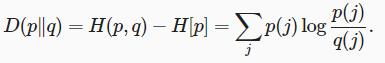


Lưu ý rằng trong bài toán phân loại, ta không biết giá trị thật của  p
 , vì thế mà ta không thể tính toán entropy trực tiếp được. Tuy nhiên, bởi vì entropy nằm ngoài tầm kiểm soát của chúng ta, việc giảm thiểu $D(p∥q)$ so với  $q$ là tương đương với việc giảm thiểu mất mát entropy chéo.

Tóm lại, chúng ta có thể nghĩ đến mục tiêu của phân loại entropy chéo theo hai hướng: (i) cực đại hóa khả năng xảy ra của dữ liệu được quan sát; và (ii) giảm thiểu sự ngạc nhiên của ta (cũng như số lượng các bit) cần thiết để truyền đạt các nhãn.

#3.4.4. Sử dụng Mô hình để dự đoán và đánh giá

Sau khi huấn luyện mô hình hồi quy softmax với các đặc trưng đầu vào bất kì, chúng ta có thể dự đoán xác suất đầu ra ứng với mỗi lớp. Thông thường, chúng ta sử dụng lớp với xác suất dự đoán cao nhất làm lớp đầu ra. Một dự đoán được xem là chính xác nếu nó trùng khớp hay tương thích với lớp thật sự (nhãn). Ở phần tiếp theo của thí nghiệm, chúng ta sẽ sử dụng độ chính xác để đánh giá chất lượng của mô hình. Giá trị này là tỉ lệ giữa số mẫu được dự đoán chính xác so với tổng số mẫu được dự đoán.